# <font color='#d50283'>IT Academy - Data Science Itinerary</font>
## Sprint 5 Task 1 - Log Transformation with Regular Expressions
### Assignment by: Kat Weissman

#### Python Learning Objectives:
- Regular Expression Application
- Analysis of records - logs

*Recommended learning resources:*
- W3Schools: https://www.w3schools.com/python/python_classes.asp
- https://www.w3schools.com/python/python_reference.asp
- https://www.w3schools.com/python/scipy/scipy_intro.php

### Description
Log analysis is an important function for monitoring and alerting, compliance with security policies, auditing and regulatory compliance, responding to security incidents, and even forensic investigations. By analyzing log data, companies can more easily identify potential threats and other problems, find the root cause, and initiate a rapid response to mitigate risks.

### Level 1
The analyst must ensure that the records consist of a full range of messages and are interpreted according to the context. Registration elements should be standardized, using the same terms or terminology, to avoid confusion and provide cohesion.

As a Data Scientist you have been provided with access to the Logs-Logs where the activity of all visits to the travel agency's website "akumenius.com" is recorded.

### Exercise 1
Standardize, identify, and enumerate each of the attributes / variables in the "Web_access_log-akumenius.com" file structure that you will find in the "Data-sources" GitHub repository.
https://github.com/IT-Academy-BCN/Data-Science/tree/main/Data-sources

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import re # for regular expressions
from datetime import datetime
import pytz #for time zones
import matplotlib.pyplot as plt
import seaborn as sns

Reference and sample code for loading logs in pandas: https://mmas.github.io/read-apache-access-log-pandas

In [2]:
def parse_str(x):
    """
    Returns the string delimited by two characters.

    Example:
        `>>> parse_str('[my string]')`
        `'my string'`
    """
    return x[1:-1]

def parse_datetime(x):
    '''
    Parses datetime with timezone formatted as:
        `[day/month/year:hour:minute:second zone]`

    Example:
        `>>> parse_datetime('13/Nov/2015:11:45:42 +0000')`
        `datetime.datetime(2015, 11, 3, 11, 45, 4, tzinfo=<UTC>)`

    Due to problems parsing the timezone (`%z`) with `datetime.strptime`, the
    timezone will be obtained using the `pytz` library.
    '''
    dt = datetime.strptime(x[1:-7], '%d/%b/%Y:%H:%M:%S')
    dt_tz = int(x[-6:-3])*60+int(x[-3:-1])
    return dt.replace(tzinfo=pytz.FixedOffset(dt_tz))

In [3]:
data_link = '/Users/kat/Library/Mobile Documents/com~apple~CloudDocs/IT Academy/Data Science Itinerary/Sprint 5 - Other Basic Python Modules/Web_access_log-akumenius.com.txt'
df = pd.read_csv(
    data_link,
    sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
    engine='python',
    na_values='-',
    header=None,
    usecols=[0, 1, 4, 5, 6, 7, 8, 9],
    names=['virtual_host','ip', 'time', 'request', 'status', 'size', 'referer', 'user_agent'],
    converters={'time': parse_datetime,
                'request': parse_str,
                'status': int,
                'size': int,
                'referer': parse_str,
                'user_agent': parse_str})

In [4]:
#Show number of rows and columns in dataframe
df.shape

(261873, 8)

In [5]:
#Show column names
df.columns

Index(['virtual_host', 'ip', 'time', 'request', 'status', 'size', 'referer',
       'user_agent'],
      dtype='object')

In [6]:
#Display first 10 rows of dataframe
df.head(10)

,virtual_host,ip,time,request,status,size,referer,user_agent
0,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection)
1,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection)
2,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection)
3,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection)
4,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection)
5,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection)
6,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection)
7,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection)
8,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection)
9,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection)


In [7]:
#Display last 10 rows of dataframe
df.tail(10)

,virtual_host,ip,time,request,status,size,referer,user_agent
261863,akumenius.com,5.255.253.53,2014-03-02 03:05:32+01:00,GET /robots.txt HTTP/1.1,301,301,NaN,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
261864,akumenius.es,5.255.253.53,2014-03-02 03:05:33+01:00,GET /robots.txt HTTP/1.1,301,304,NaN,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
261865,akumenius.com,5.255.253.53,2014-03-02 03:05:35+01:00,GET / HTTP/1.1,301,301,NaN,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
261866,www.akumenius.com,5.255.253.53,2014-03-02 03:05:34+01:00,GET / HTTP/1.1,200,7528,NaN,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
261867,akumenius.es,5.255.253.53,2014-03-02 03:05:35+01:00,GET / HTTP/1.1,301,304,NaN,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
261868,www.akumenius.com,5.255.253.53,2014-03-02 03:05:39+01:00,GET / HTTP/1.1,200,7528,NaN,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
261869,www.akumenius.com,74.86.158.107,2014-03-02 03:09:52+01:00,HEAD / HTTP/1.1,200,NaN,NaN,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...
261870,localhost,127.0.0.1,2014-03-02 03:10:18+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection)
261871,localhost,127.0.0.1,2014-03-02 03:10:18+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection)
261872,localhost,127.0.0.1,2014-03-02 03:10:18+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection)


In [8]:
#Checking dataset variables
df.dtypes

virtual_host                                  object
ip                                            object
time            datetime64[ns, pytz.FixedOffset(60)]
request                                       object
status                                         int64
size                                          object
referer                                       object
user_agent                                    object
dtype: object

In [9]:
#View summary statistics of each variable.
for v in df.columns:
    if v == "time":
        print ("\n" + v)
        print(df[v].describe(datetime_is_numeric=True))
        print ()
    else:
        print ("\n" + v)
        print(df[v].describe())
        print ()


virtual_host
count                261873
unique                    5
top       www.akumenius.com
freq                 232300
Name: virtual_host, dtype: object


ip
count            261873
unique             2921
top       66.249.76.216
freq              46382
Name: ip, dtype: object


time
count                                 261873
mean     2014-02-26 01:36:11.284419840+01:00
min                2014-02-23 03:10:31+01:00
25%                2014-02-24 13:19:32+01:00
50%                2014-02-25 18:40:37+01:00
75%                2014-02-27 13:42:26+01:00
max                2014-03-02 03:10:18+01:00
Name: time, dtype: object


request
count                 261836
unique                 66763
top       OPTIONS * HTTP/1.0
freq                   13892
Name: request, dtype: object


status
count    261873.000000
mean        217.400721
std          46.993063
min         200.000000
25%         200.000000
50%         200.000000
75%         200.000000
max         502.000000
Name: status, dtype

In [10]:
host_counts = df.virtual_host.value_counts()
host_counts

www.akumenius.com     232300
test.akumenius.com     14610
localhost              14127
akumenius.com            742
akumenius.es              94
Name: virtual_host, dtype: int64

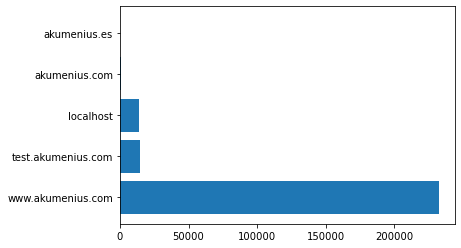

In [11]:
plt.barh(host_counts.index, host_counts)
plt.show()

In [12]:
status_counts = df.status.value_counts()
status_counts

200    226382
304     25269
404      8630
301       870
206       304
403       194
302       109
502        44
408        37
400        26
401         5
500         3
Name: status, dtype: int64

### Level 2
### Exercise 2
Clean, preprocess, structure and transform (dataframe) the data in the Web Access register.

### Exercise 3
Geolocate IP's.

Sample Code & Instructions: https://www.abstractapi.com/guides/how-to-geolocate-an-ip-address-in-python

In [13]:
import requests
import json

def geolocate(ip):
    """
    Returns the dictionary of geolocation information.
    """    
    ip_address = ip

    # URL to send the request to
    request_url = 'https://geolocation-db.com/jsonp/' + ip_address
    # Send request and decode the result
    response = requests.get(request_url)
    try:    
        result = response.content.decode()
        # Clean the returned string so it just contains the dictionary data for the IP address
        result = result.split("(")[1].strip(")")
        # Convert this data into a dictionary
        result  = json.loads(result)
    except:
        result = "Error"
    return(result)

In [14]:
#Get the most frequent ip address from dataframe and save as string.
top_ip = str(df.ip.mode()[0])
top_ip

'66.249.76.216'

In [15]:
#test geolocate function using the most frequent ip
geolocate(top_ip)

{'country_code': 'US',
 'country_name': 'United States',
 'city': None,
 'postal': None,
 'latitude': 37.751,
 'longitude': -97.822,
 'IPv4': '66.249.76.216',
 'state': None}

In [16]:
#create a data frame of unique ip addresses
data = {
    "ip": df.ip.unique()
  }
#load data into a DataFrame object:
df_ip = pd.DataFrame(data)
df_ip

,ip
0,127.0.0.1
1,66.249.76.216
2,5.255.253.53
3,157.55.35.112
4,193.111.141.116
...,...
2916,46.222.83.180
2917,79.155.78.117
2918,217.174.248.179
2919,188.135.173.80


In [17]:
#convert ip field to a string for compatability with function geolocate()
df_ip.ip = df_ip.ip.astype('str')

In [18]:
#create a small testing data set
df_ip_test = df_ip[0:10]
df_ip_test

,ip
0,127.0.0.1
1,66.249.76.216
2,5.255.253.53
3,157.55.35.112
4,193.111.141.116
5,5.10.83.71
6,180.76.5.223
7,180.76.6.148
8,180.76.5.188
9,180.76.6.135


In [19]:
#test geolocate() with one ip address from the data set
geolocate(df_ip_test.ip[4])

{'country_code': 'DE',
 'country_name': 'Germany',
 'city': 'Düsseldorf',
 'postal': '40472',
 'latitude': 51.2686,
 'longitude': 6.8100000000000005,
 'IPv4': '193.111.141.116',
 'state': 'North Rhine-Westphalia'}

In [20]:
#apply lambda method to create new column using geolocate()
df_ip_test['geolocation'] = df_ip_test.apply(lambda row: geolocate(row['ip']),axis=1)

/var/folders/fm/mghr685s1l70_6sxmqyh0zlc0000gn/T/ipykernel_18183/2272910513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ip_test['geolocation'] = df_ip_test.apply(lambda row: geolocate(row['ip']),axis=1)


I received an error for trying to update a view instead of updating the actual dataframe.

In [21]:
df_ip_test

,ip,geolocation
0,127.0.0.1,"{'country_code': 'Not found', 'country_name': ..."
1,66.249.76.216,"{'country_code': 'US', 'country_name': 'United..."
2,5.255.253.53,"{'country_code': 'RU', 'country_name': 'Russia..."
3,157.55.35.112,"{'country_code': 'US', 'country_name': 'United..."
4,193.111.141.116,"{'country_code': 'DE', 'country_name': 'German..."
5,5.10.83.71,"{'country_code': 'NL', 'country_name': 'Nether..."
6,180.76.5.223,"{'country_code': 'CN', 'country_name': 'China'..."
7,180.76.6.148,"{'country_code': 'CN', 'country_name': 'China'..."
8,180.76.5.188,"{'country_code': 'CN', 'country_name': 'China'..."
9,180.76.6.135,"{'country_code': 'CN', 'country_name': 'China'..."


The test was successful using a small dataframe of 10 rows.

In [22]:
#df_ip['geolocation'] = df_ip.apply(lambda row: geolocate(row['ip']),axis=1)

I was able to successfully geolocate some ip addresses using a test of 10 rows, however when I tried to apply the function to all of the ip addresses in the data set, I received an error from the geolocation website that I exceeded the maximum retries. I will try again with 50 rows.

SSLError: HTTPSConnectionPool(host='geolocation-db.com', port=443): Max retries exceeded with url: /jsonp/80.24.18.93 (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1125)')))

In [23]:
#use .copy() to avoid error when updating
df_ip_short = df_ip[0:50].copy()

In [24]:
df_ip_short['geolocation'] = df_ip_short.apply(lambda row: geolocate(row['ip']),axis=1)

In [25]:
df_ip_short.head(15)

,ip,geolocation
0,127.0.0.1,"{'country_code': 'Not found', 'country_name': ..."
1,66.249.76.216,"{'country_code': 'US', 'country_name': 'United..."
2,5.255.253.53,"{'country_code': 'RU', 'country_name': 'Russia..."
3,157.55.35.112,"{'country_code': 'US', 'country_name': 'United..."
4,193.111.141.116,"{'country_code': 'DE', 'country_name': 'German..."
5,5.10.83.71,"{'country_code': 'NL', 'country_name': 'Nether..."
6,180.76.5.223,"{'country_code': 'CN', 'country_name': 'China'..."
7,180.76.6.148,"{'country_code': 'CN', 'country_name': 'China'..."
8,180.76.5.188,"{'country_code': 'CN', 'country_name': 'China'..."
9,180.76.6.135,"{'country_code': 'CN', 'country_name': 'China'..."


In [26]:
df_ip_short.tail(15)

,ip,geolocation
35,5.10.83.88,"{'country_code': 'NL', 'country_name': 'Nether..."
36,180.76.5.23,"{'country_code': 'CN', 'country_name': 'China'..."
37,180.76.5.145,"{'country_code': 'CN', 'country_name': 'China'..."
38,180.76.6.16,"{'country_code': 'CN', 'country_name': 'China'..."
39,176.31.255.177,"{'country_code': 'FR', 'country_name': 'France..."
40,185.10.104.131,"{'country_code': None, 'country_name': None, '..."
41,180.76.6.55,"{'country_code': 'CN', 'country_name': 'China'..."
42,180.76.5.95,"{'country_code': 'CN', 'country_name': 'China'..."
43,180.76.6.59,"{'country_code': 'CN', 'country_name': 'China'..."
44,157.55.33.26,"{'country_code': 'US', 'country_name': 'United..."


In [27]:
df_ip_short.geolocation.describe()

count                                                    50
unique                                                   50
top       {'country_code': 'Not found', 'country_name': ...
freq                                                      1
Name: geolocation, dtype: object

Reference for expanding a column of a dictionary: https://stackoverflow.com/questions/38231591/split-explode-a-column-of-dictionaries-into-separate-columns-with-pandas

In [31]:
#expand geolocation dictionary to new columns
df_ip_short = pd.concat([df_ip_short.drop(['geolocation'], axis=1), df_ip_short['geolocation'].apply(pd.Series)], axis=1)

In [45]:
df_ip_short

,ip,country_code,country_name,city,postal,latitude,longitude,IPv4,state
0,127.0.0.1,Not found,Not found,Not found,Not found,Not found,Not found,IP Not found,Not found
1,66.249.76.216,US,United States,None,None,37.751,-97.822,66.249.76.216,None
2,5.255.253.53,RU,Russia,None,None,55.7386,37.6068,5.255.253.53,None
3,157.55.35.112,US,United States,None,None,47.6062,-122.3321,157.55.35.112,Washington
4,193.111.141.116,DE,Germany,Düsseldorf,40472,51.2686,6.81,193.111.141.116,North Rhine-Westphalia
5,5.10.83.71,NL,Netherlands,Amsterdam,1091,52.3556,4.9135,5.10.83.71,North Holland
6,180.76.5.223,CN,China,None,None,39.9289,116.3883,180.76.5.223,Beijing
7,180.76.6.148,CN,China,None,None,39.9289,116.3883,180.76.6.148,Beijing
8,180.76.5.188,CN,China,None,None,39.9289,116.3883,180.76.5.188,Beijing
9,180.76.6.135,CN,China,None,None,39.9289,116.3883,180.76.6.135,Beijing


In [33]:
df_ip_short.country_name.describe()

count        49
unique        8
top       China
freq         26
Name: country_name, dtype: object

In [34]:
df_ip_short.city.describe()

count            15
unique            8
top       Amsterdam
freq              7
Name: city, dtype: object

In [35]:
df_ip_short.state.describe()

count          46
unique          9
top       Beijing
freq           26
Name: state, dtype: object

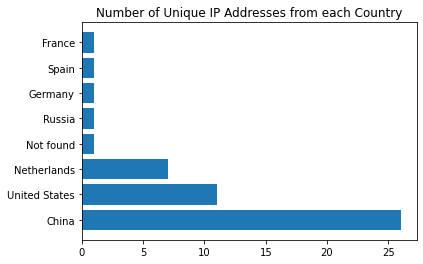

In [42]:
country_counts = df_ip_short.country_name.value_counts()
plt.barh(country_counts.index, country_counts)
plt.title("Number of Unique IP Addresses from each Country")
plt.show()

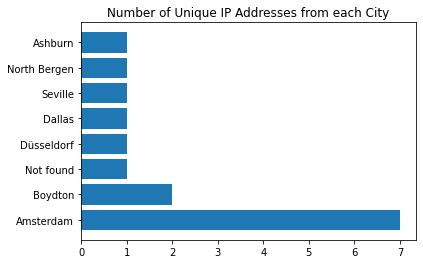

In [43]:
city_counts = df_ip_short.city.value_counts()
plt.barh(city_counts.index, city_counts)
plt.title("Number of Unique IP Addresses from each City")
plt.show()

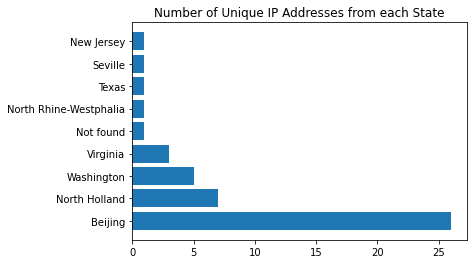

In [44]:
state_counts = df_ip_short.state.value_counts()
plt.barh(state_counts.index, state_counts)
plt.title("Number of Unique IP Addresses from each State")
plt.show()

The data is incomplete because not all geolocation data was available for each IP address, and I could not call the entire database for the geolocate() function.